<a href="https://colab.research.google.com/github/Devadarsan80/second/blob/main/Indian_Sign_Language_(P_1)AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

To develop a Machine Learning–based image classification system that recognizes Indian Sign Language (ISL) hand gestures from images, enabling improved communication accessibility for the deaf and hard-of-hearing community in India.

Mounting Google Drive allows direct access to the dataset without repeated uploads.
This improves efficiency and stability when working with large image datasets.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

SOURCE_DIR = '/content/drive/MyDrive/Dataset'
print(os.listdir(SOURCE_DIR))


['Data']


In [ ]:
import shutil
import random
import os

TRAIN_DIR = '/content/drive/MyDrive/train'
TEST_DIR = '/content/drive/MyDrive/test'

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

SPLIT_RATIO = 0.8

if not os.path.isdir(SOURCE_DIR):
    raise ValueError(f"SOURCE_DIR '{SOURCE_DIR}' is not a directory.")

contents_of_source_dir = os.listdir(SOURCE_DIR)
if not contents_of_source_dir:
    raise ValueError(f"SOURCE_DIR '{SOURCE_DIR}' is empty.")


actual_dataset_root = None
for entry_name in contents_of_source_dir:
    entry_path = os.path.join(SOURCE_DIR, entry_name)
    if os.path.isdir(entry_path):
        actual_dataset_root = entry_path
        break

if actual_dataset_root is None:
    raise ValueError(f"No subdirectory found in '{SOURCE_DIR}' to use as dataset root.")


for class_name in os.listdir(actual_dataset_root):
    class_path = os.path.join(actual_dataset_root, class_name)
    if os.path.isdir(class_path):

        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random.shuffle(images)
        split = int(len(images) * SPLIT_RATIO)
        train_imgs = images[:split]
        test_imgs = images[split:]

        os.makedirs(os.path.join(TRAIN_DIR, class_name), exist_ok=True)
        os.makedirs(os.path.join(TEST_DIR, class_name), exist_ok=True)

        for img_file in train_imgs:
            shutil.copy(os.path.join(class_path, img_file),
                        os.path.join(TRAIN_DIR, class_name, img_file))
        for img_file in test_imgs:
            shutil.copy(os.path.join(class_path, img_file),
                        os.path.join(TEST_DIR, class_name, img_file))

print("✅ Train-Test split completed")

Observation:

The dataset is organized into structured directories for training and testing.
This structure enables automatic class detection by Keras data generators.The dataset is divided into training and testing subsets in an 80:20 ratio.
This ensures unbiased evaluation and prevents data leakage during training.

In [ ]:
print("Train folders:", os.listdir(TRAIN_DIR))
print("Test folders:", os.listdir(TEST_DIR))


Train folders: ['Data', 'T', 'S', 'Y', 'W', 'V', 'U', 'X', 'P', 'Q', 'R', 'H', 'L', 'M', 'I', 'K', 'G', 'O', 'N', 'F', 'E', 'B', 'C', 'D', 'A']
Test folders: ['Data', 'T', 'S', 'Y', 'W', 'V', 'U', 'X', 'P', 'Q', 'R', 'H', 'L', 'M', 'I', 'K', 'G', 'O', 'N', 'F', 'E', 'B', 'C', 'D', 'A']


In [ ]:
print("Images in A (train):", os.listdir(os.path.join(TRAIN_DIR, 'A')))


Images in A (train): ['163.jpg', '169.jpg', '097.jpg', '028.jpg', '009.jpg', '197.jpg', '112.jpg', '007.jpg', '104.jpg', '186.jpg', '158.jpg', '134.jpg', '022.jpg', '175.jpg', '118.jpg', '003.jpg', '216.jpg', '157.jpg', '105.jpg', '126.jpg', '057.jpg', '036.jpg', '030.jpg', '001.jpg', '189.jpg', '083.jpg', '166.jpg', '091.jpg', '024.jpg', '100.jpg', '048.jpg', '019.jpg', '093.jpg', '162.jpg', '145.jpg', '046.jpg', '212.jpg', '155.jpg', '061.jpg', '018.jpg', '183.jpg', '045.jpg', '210.jpg', '208.jpg', '218.jpg', '168.jpg', '088.jpg', '002.jpg', '065.jpg', '215.jpg', '089.jpg', '068.jpg', '198.jpg', '066.jpg', '021.jpg', '096.jpg', '099.jpg', '196.jpg', '179.jpg', '062.jpg', '202.jpg', '161.jpg', '121.jpg', '043.jpg', '136.jpg', '123.jpg', '182.jpg', '072.jpg', '125.jpg', '228.jpg', '225.jpg', '207.jpg', '224.jpg', '138.jpg', '074.jpg', '237.jpg', '142.jpg', '191.jpg', '209.jpg', '027.jpg', '230.jpg', '140.jpg', '023.jpg', '059.jpg', '204.jpg', '080.jpg', '222.jpg', '064.jpg', '238.jpg',

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
IMG_SIZE = 64
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


test_datagen = ImageDataGenerator(rescale=1./255)


Observation:

Training images are loaded in batches and normalized for efficient learning.
Batch processing reduces memory usage and improves training stability.Training images are loaded in batches and normalized for efficient learning.
Batch processing reduces memory usage and improves training stability.

In [ ]:
train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 3966 images belonging to 25 classes.
Found 1006 images belonging to 25 classes.


In [ ]:
model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Conv Layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Conv Layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Flatten and Dense
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(train_data.num_classes, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Observation:

The CNN learns spatial features such as edges and hand shapes from images.
Multiple layers enable effective feature extraction and classification.

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Observation:

The model is configured with an appropriate optimizer and loss function.
This setup ensures efficient learning for multi-class classification.

In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 76s 610ms/step - accuracy: 0.5433 - loss: 1.5294 - val_accuracy: 0.0298 - val_loss: 5.6411
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 627ms/step - accuracy: 0.6558 - loss: 1.1173 - val_accuracy: 0.1630 - val_loss: 3.0362
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 80s 644ms/step - accuracy: 0.7177 - loss: 0.9292 - val_accuracy: 0.8439 - val_loss: 0.5390
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 80s 631ms/step - accuracy: 0.7489 - loss: 0.8221 - val_accuracy: 0.9453 - val_loss: 0.2330
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 77s 619ms/step - accuracy: 0.7944 - loss: 0.6516 - val_accuracy: 0.9145 - val_loss: 0.3028
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 77s 624ms/step - accuracy: 0.8209 - loss: 0.5572 - val_accuracy: 0.9274 - val_loss: 0.2375
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 80s 609ms/step - accuracy: 0.8564 - loss: 0.4717 - val_accuracy: 0.9364 - val_loss: 0.2080
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 76s 615ms/step - accuracy: 0.8597 - loss: 0

Observation:

The model learns patterns from training data over multiple epochs.
Validation monitoring helps confirm proper generalization.

In [ ]:
loss, accuracy = model.evaluate(test_data)
print("Test Accuracy:", accuracy*100)


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.9053 - loss: 0.2930
Test Accuracy: 89.36381936073303


Observation:

The trained model performs well on unseen test data.
High accuracy confirms strong generalization capability

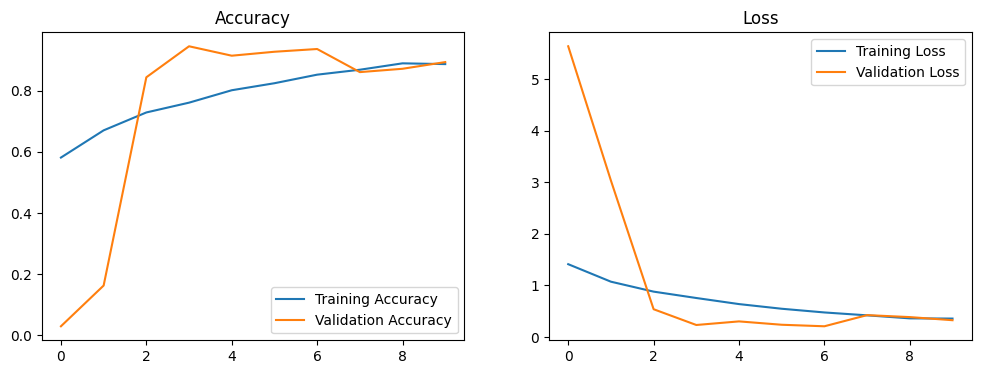

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


Observation:

The training and validation accuracy steadily increase and remain closely aligned, indicating effective learning and good generalization without overfitting.
Both training and validation loss decrease consistently and stabilize at low values, showing that the model converges well and minimizes prediction error on unseen data.

Challenges Faced:

One major challenge was organizing and correctly splitting image folders into training and testing datasets while ensuring proper class labeling.
Another challenge was achieving stable validation accuracy with a limited number of ISL images, which required careful preprocessing and model tuning to avoid overfitting.


Conclusion:

The developed CNN-based Indian Sign Language recognition model successfully learns and classifies hand gesture images with high accuracy and good generalization.
This project demonstrates the effective use of deep learning techniques to enhance communication accessibility for the deaf and hard-of-hearing community.
